In [44]:
import pandas as pd

fish = pd.read_csv("/home/seokjun/kubig2025/ml_dt_python/data/fish_csv_data.csv")

In [45]:
fish_input = fish[["Weight","Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish[["Species"]].to_numpy()

In [46]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [1]:
from sklearn.linear_model import SGDClassifier


In [49]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [50]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.7983193277310925
0.775


/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [52]:
for _ in range(0,300): # 1 loop 1 epoche
    sc.partial_fit(train_scaled,train_target,classes=classes)
    
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

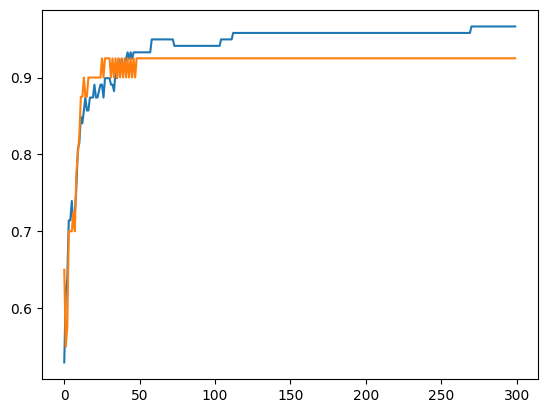

In [53]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [54]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)
n_epochs = 300
n_batches = 5
n_sample = train_scaled.shape[0]
print(n_sample)
batch_size = n_sample // n_batches

119


In [55]:
for epoch in range(n_epochs):
    indices = np.random.permutation(n_sample)
    train_scaled_shuffled = train_scaled[indices]
    train_target_shuffled = train_target[indices]
    
    for i in range(n_batches):
        start = i * batch_size
        if i == n_batches-1:
            end = n_sample
        else:
            end = (i+1)* batch_size
        batch_X = train_scaled_shuffled[start:end]
        batch_Y = train_target_shuffled[start:end]
        
        if epoch == 0 and i == 0:
            sc.partial_fit(batch_X, batch_Y, classes=classes)
        else:
            sc.partial_fit(batch_X,batch_Y)
        train_score.append(sc.score(train_scaled, train_target))
        test_score.append(sc.score(test_scaled,test_target))
        

/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/seokjun/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

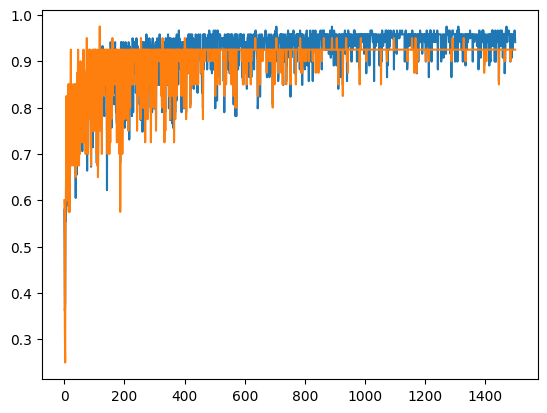

In [56]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()